# xG vs xA

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.transforms import ScaledTranslation

from PIL import Image
import urllib
import os

In [166]:
pip install highlight-text

Note: you may need to restart the kernel to use updated packages.


In [168]:
from highlight_text import ax_text, fig_text

## ->Scraping Data 

In [3]:
url = "https://understat.com/league/EPL/2022"

In [4]:
import requests
from bs4 import BeautifulSoup
import json

In [5]:
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')


In [6]:
strings = scripts[3].string

In [7]:
strings[:750]

"\n\tvar playersData\t= JSON.parse('\\x5B\\x7B\\x22id\\x22\\x3A\\x228260\\x22,\\x22player_name\\x22\\x3A\\x22Erling\\x20Haaland\\x22,\\x22games\\x22\\x3A\\x227\\x22,\\x22time\\x22\\x3A\\x22588\\x22,\\x22goals\\x22\\x3A\\x2211\\x22,\\x22xG\\x22\\x3A\\x228.347453117370605\\x22,\\x22assists\\x22\\x3A\\x221\\x22,\\x22xA\\x22\\x3A\\x221.1396358013153076\\x22,\\x22shots\\x22\\x3A\\x2227\\x22,\\x22key_passes\\x22\\x3A\\x223\\x22,\\x22yellow_cards\\x22\\x3A\\x220\\x22,\\x22red_cards\\x22\\x3A\\x220\\x22,\\x22position\\x22\\x3A\\x22F\\x22,\\x22team_title\\x22\\x3A\\x22Manchester\\x20City\\x22,\\x22npg\\x22\\x3A\\x2210\\x22,\\x22npxG\\x22\\x3A\\x227.586284160614014\\x22,\\x22xGChain\\x22\\x3A\\x226.843545496463776\\x22,\\x22xGBuildup\\x22\\x3A\\x220.5759349958971143\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22647\\x22,\\x22player_name\\x22\\x3A\\x22Harry\\x20Kane\\x"

In [8]:
# strip unnecessary symbols and get only JSON data 
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)

In [9]:
data[:1]

[{'id': '8260',
  'player_name': 'Erling Haaland',
  'games': '7',
  'time': '588',
  'goals': '11',
  'xG': '8.347453117370605',
  'assists': '1',
  'xA': '1.1396358013153076',
  'shots': '27',
  'key_passes': '3',
  'yellow_cards': '0',
  'red_cards': '0',
  'position': 'F',
  'team_title': 'Manchester City',
  'npg': '10',
  'npxG': '7.586284160614014',
  'xGChain': '6.843545496463776',
  'xGBuildup': '0.5759349958971143'}]

In [10]:

player_name = []
games = []
time = []
goals = []
xG = []
assists = []
xA =[]
shots =[]
key_passes =[]
yellow_cards =[]
red_cards =[]
position =[]
team_title =[]
npg =[]
npxG =[]
xGChain =[]
xGBuildup =[]


for index in range(len(data)):
    for key in data[index]:
        if key == 'player_name':
            player_name.append(data[index][key])
        if key == 'games':
            games.append(data[index][key])
        if key == 'time':
            time.append(data[index][key])
        if key == 'goals':
            goals.append(data[index][key])
        if key == 'xG':
            xG.append(data[index][key])
        if key == 'assists':
            assists.append(data[index][key])
        if key == 'xA':
            xA.append(data[index][key])
        if key == 'shots':
            shots.append(data[index][key])
        if key == 'key_passes':
            key_passes.append(data[index][key])
        if key == 'yellow_cards':
            yellow_cards.append(data[index][key])
        if key == 'red_cards':
            red_cards.append(data[index][key])
        if key == 'position':
            position.append(data[index][key])
        if key == 'team_title':
            team_title.append(data[index][key])
        if key == 'npg':
            npg.append(data[index][key])
        if key == 'npxG':
            npxG.append(data[index][key])
        if key == 'npg':
            npg.append(data[index][key])
        if key == 'npxG':
            npxG.append(data[index][key])
        if key == 'xGChain':
            xGChain.append(data[index][key])
        if key == 'xGBuildup':
            xGBuildup.append(data[index][key])
        

In [11]:
len(xGBuildup)

412

In [12]:

col_names = [player_name,
games,
time,
goals,
xG,
assists,
xA,
shots,
key_passes,
yellow_cards,
red_cards,
position,
team_title,
npg,
npxG,
xGChain,
xGBuildup]
for y in col_names:
    print(len(y))

412
412
412
412
412
412
412
412
412
412
412
412
412
824
824
412
412


In [13]:
len(npg)

824

In [14]:
len(npxG)

824

In [15]:
npg = npg[:412]

In [16]:
npxG = npxG[:412]

In [17]:

col_names = [player_name,
games,
time,
goals,
xG,
assists,
xA,
shots,
position,
team_title,
npg,
npxG]
for y in col_names:
    print(len(y))

412
412
412
412
412
412
412
412
412
412
412
412


In [18]:
col_names = [player_name,
games,
time,
goals,
xG,
assists,
xA,
shots,
key_passes,
yellow_cards,
red_cards,
position,
team_title,
npg,
npxG,
xGChain,
xGBuildup]

df = pd.DataFrame([player_name,
games,
time,
goals,
xG,
assists,
xA,
shots,
key_passes,
yellow_cards,
red_cards,
position,
team_title,
npg,
npxG,
xGChain,
xGBuildup])
df = df.T

In [19]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Erling Haaland,7,588,11,8.347453117370605,1,1.1396358013153076,27,3,0,0,F,Manchester City,10,7.586284160614014,6.843545496463776,0.5759349958971143
1,Harry Kane,7,624,6,5.165230765938759,1,2.044822558760643,25,16,2,0,F,Tottenham,10,7.586284160614014,5.257903635501862,0.7281534075737
2,Aleksandar Mitrovic,7,630,6,4.5282152146101,0,0.3759484924376011,31,5,2,0,F,Fulham,6,4.404061928391457,3.2239301279187202,0.8320949859917164
3,Ivan Toney,7,630,5,3.6090632434934378,2,1.5053680017590523,17,11,1,0,F,Brentford,6,4.404061928391457,4.079507291316986,1.4232266247272491
4,Wilfried Zaha,5,444,4,3.0018642712384462,0,0.8641624040901661,15,7,1,0,F M,Crystal Palace,5,3.005877509713173,3.114739939570427,0.8463326990604401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,Ryan Yates,5,360,0,0.5062114149332047,1,0.5011679902672768,11,3,0,0,M S,Nottingham Forest,0,0.4115436486899853,0.6719654202461243,0.2232782132923603
408,Owen Bevan,1,6,0,0,0,0,0,0,0,0,S,Bournemouth,0,0.18138672411441803,0,0
409,Marquinhos,1,1,0,0,0,0,0,0,0,0,S,Arsenal,0,0.18138672411441803,0,0
410,Juan Larios,1,41,0,0,0,0,0,0,0,0,S,Southampton,0,0,0,0


In [20]:
df.columns = ["player_name",
"games",
"time",
"goals",
"xG",
"assists",
"xA",
"shots",
"key_passes",
"yellow_cards",
"red_cards",
"position",
"team_title",
"npg",
"npxG",
"xGChain",
"xGBuildup"]

In [21]:
df

,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,Erling Haaland,7,588,11,8.347453117370605,1,1.1396358013153076,27,3,0,0,F,Manchester City,10,7.586284160614014,6.843545496463776,0.5759349958971143
1,Harry Kane,7,624,6,5.165230765938759,1,2.044822558760643,25,16,2,0,F,Tottenham,10,7.586284160614014,5.257903635501862,0.7281534075737
2,Aleksandar Mitrovic,7,630,6,4.5282152146101,0,0.3759484924376011,31,5,2,0,F,Fulham,6,4.404061928391457,3.2239301279187202,0.8320949859917164
3,Ivan Toney,7,630,5,3.6090632434934378,2,1.5053680017590523,17,11,1,0,F,Brentford,6,4.404061928391457,4.079507291316986,1.4232266247272491
4,Wilfried Zaha,5,444,4,3.0018642712384462,0,0.8641624040901661,15,7,1,0,F M,Crystal Palace,5,3.005877509713173,3.114739939570427,0.8463326990604401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,Ryan Yates,5,360,0,0.5062114149332047,1,0.5011679902672768,11,3,0,0,M S,Nottingham Forest,0,0.4115436486899853,0.6719654202461243,0.2232782132923603
408,Owen Bevan,1,6,0,0,0,0,0,0,0,0,S,Bournemouth,0,0.18138672411441803,0,0
409,Marquinhos,1,1,0,0,0,0,0,0,0,0,S,Arsenal,0,0.18138672411441803,0,0
410,Juan Larios,1,41,0,0,0,0,0,0,0,0,S,Southampton,0,0,0,0


In [22]:
df['xG'] = df['xG'].astype('float')
df['xA'] = df['xA'].astype('float')
df['time'] = df['time'].astype('float')

In [23]:
df["xG/90"]= df["xG"]*90/df["time"]


In [24]:
df["xA/90"]= df["xA"]*90/df["time"]

In [25]:
df["index"] = [i for i in range(1,413)]
df.set_index("index")

,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup,xG/90,xA/90
index,,,,,,,,,,,,,,,,,,,
1,Erling Haaland,7,588.0,11,8.347453,1,1.139636,27,3,0,0,F,Manchester City,10,7.586284160614014,6.843545496463776,0.5759349958971143,1.277671,0.174434
2,Harry Kane,7,624.0,6,5.165231,1,2.044823,25,16,2,0,F,Tottenham,10,7.586284160614014,5.257903635501862,0.7281534075737,0.744985,0.294926
3,Aleksandar Mitrovic,7,630.0,6,4.528215,0,0.375948,31,5,2,0,F,Fulham,6,4.404061928391457,3.2239301279187202,0.8320949859917164,0.646888,0.053707
4,Ivan Toney,7,630.0,5,3.609063,2,1.505368,17,11,1,0,F,Brentford,6,4.404061928391457,4.079507291316986,1.4232266247272491,0.515580,0.215053
5,Wilfried Zaha,5,444.0,4,3.001864,0,0.864162,15,7,1,0,F M,Crystal Palace,5,3.005877509713173,3.114739939570427,0.8463326990604401,0.608486,0.175168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,Ryan Yates,5,360.0,0,0.506211,1,0.501168,11,3,0,0,M S,Nottingham Forest,0,0.4115436486899853,0.6719654202461243,0.2232782132923603,0.126553,0.125292
409,Owen Bevan,1,6.0,0,0.000000,0,0.000000,0,0,0,0,S,Bournemouth,0,0.18138672411441803,0,0,0.000000,0.000000
410,Marquinhos,1,1.0,0,0.000000,0,0.000000,0,0,0,0,S,Arsenal,0,0.18138672411441803,0,0,0.000000,0.000000


### Data Cleaning

In [26]:
maxClm = df['xG/90'].max()
 
print("Maximum value in column 'x': " )
print(maxClm)

Maximum value in column 'x': 
10.269676744937897


In [27]:
m = df['xG/90'].idxmax()
m

392

In [28]:
print(df.iloc[[392]])

     player_name games  time goals        xG assists   xA shots key_passes  \
392  Djed Spence     1   1.0     0  0.114108       0  0.0     1          0   

    yellow_cards red_cards position team_title npg                  npxG  \
392            0         0        S  Tottenham   0  0.014604873955249786   

                 xGChain xGBuildup      xG/90  xA/90  index  
392  0.11410751938819885         0  10.269677    0.0    393  


In [29]:
nine = df.quantile(1)
nine

time     630.000000
xG         8.347453
xA         4.095863
xG/90     10.269677
xA/90      2.031998
index    412.000000
Name: 1.0, dtype: float64

### As we can see players like Djed Spence who have played very less mins makes creates extreme outliers

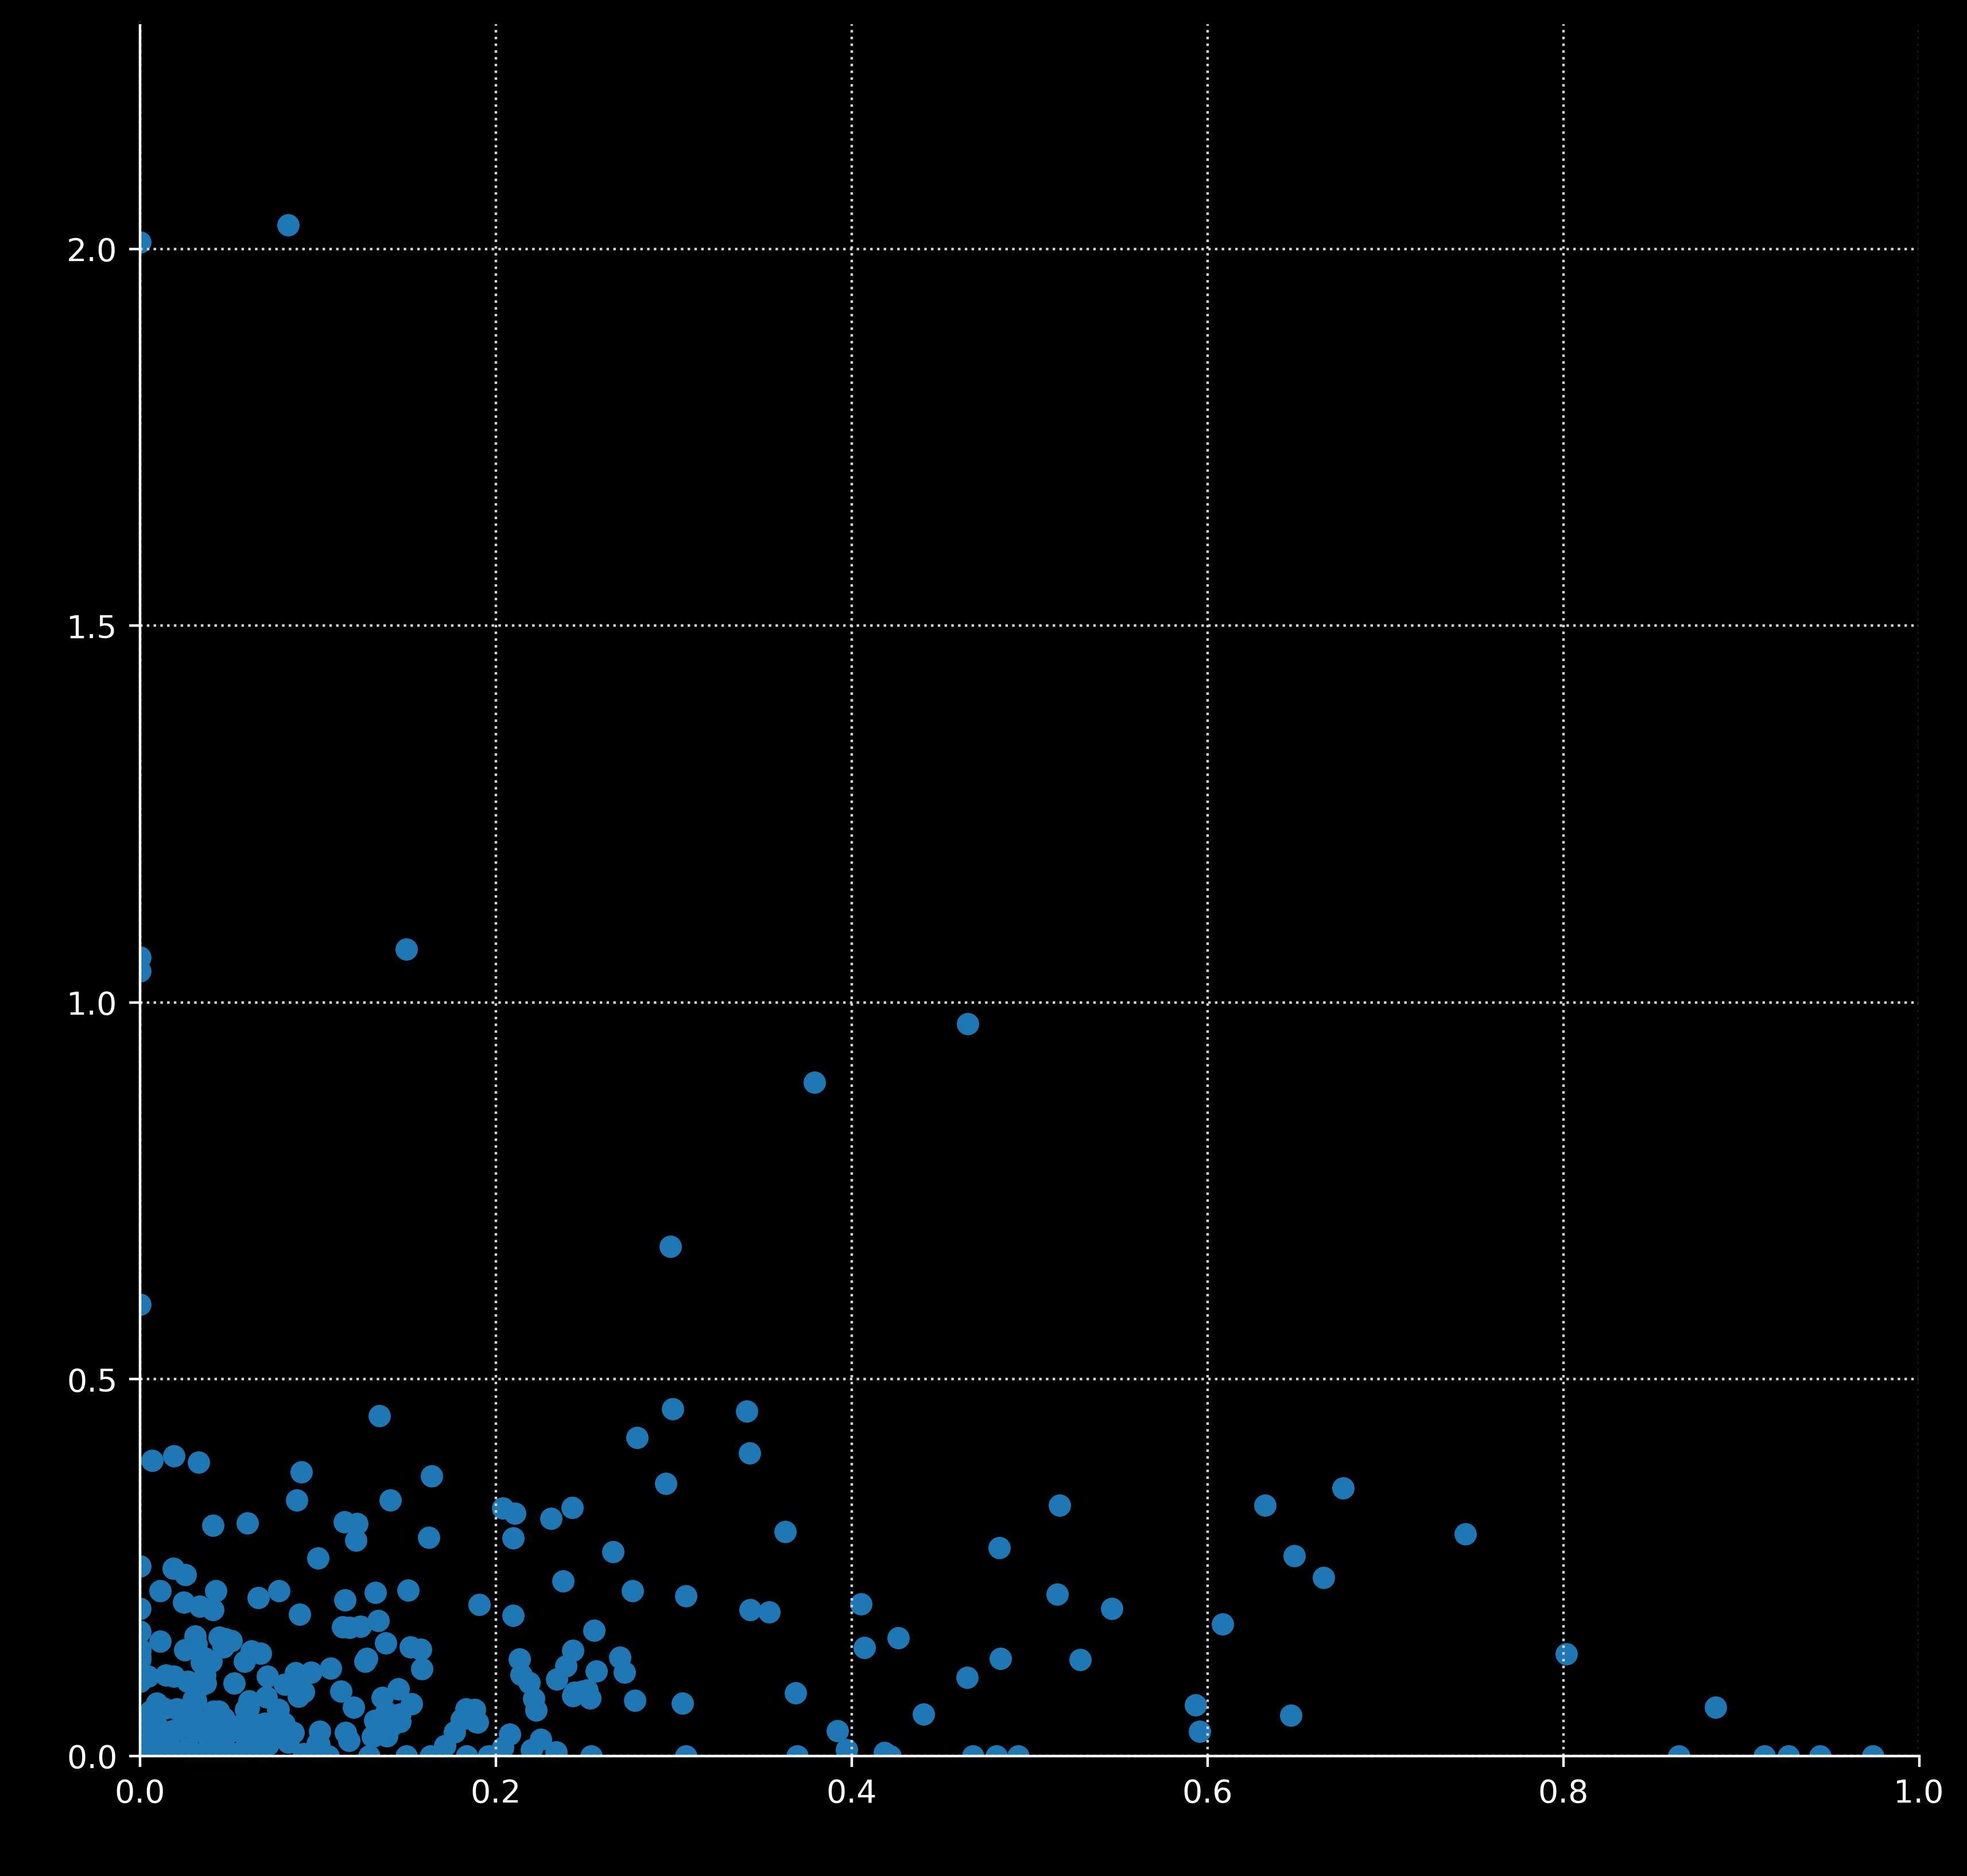

In [30]:
fig = plt.figure(figsize=(10,10), dpi=400)
ax = plt.subplot()


ax.set_ylim(0,2.3)
ax.set_xlim(0,)


fig.set_facecolor('black')
ax.patch.set_facecolor('black')


ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')



# Add spines
ax.spines["left"].set_color('white')   #spines removes the plot edges(border)
ax.spines["bottom"].set_color('white')

# Add grid and axis labels
ax.grid(True, color = "lightgrey", ls = ":") #ls = linestyle,
ax.set_xlabel("xG For")
ax.set_ylabel("xG Against")

ax.scatter(df["xG/90"],df["xA/90"])

# Adjust ticks
ax.tick_params(axis = "x", rotation = 0)

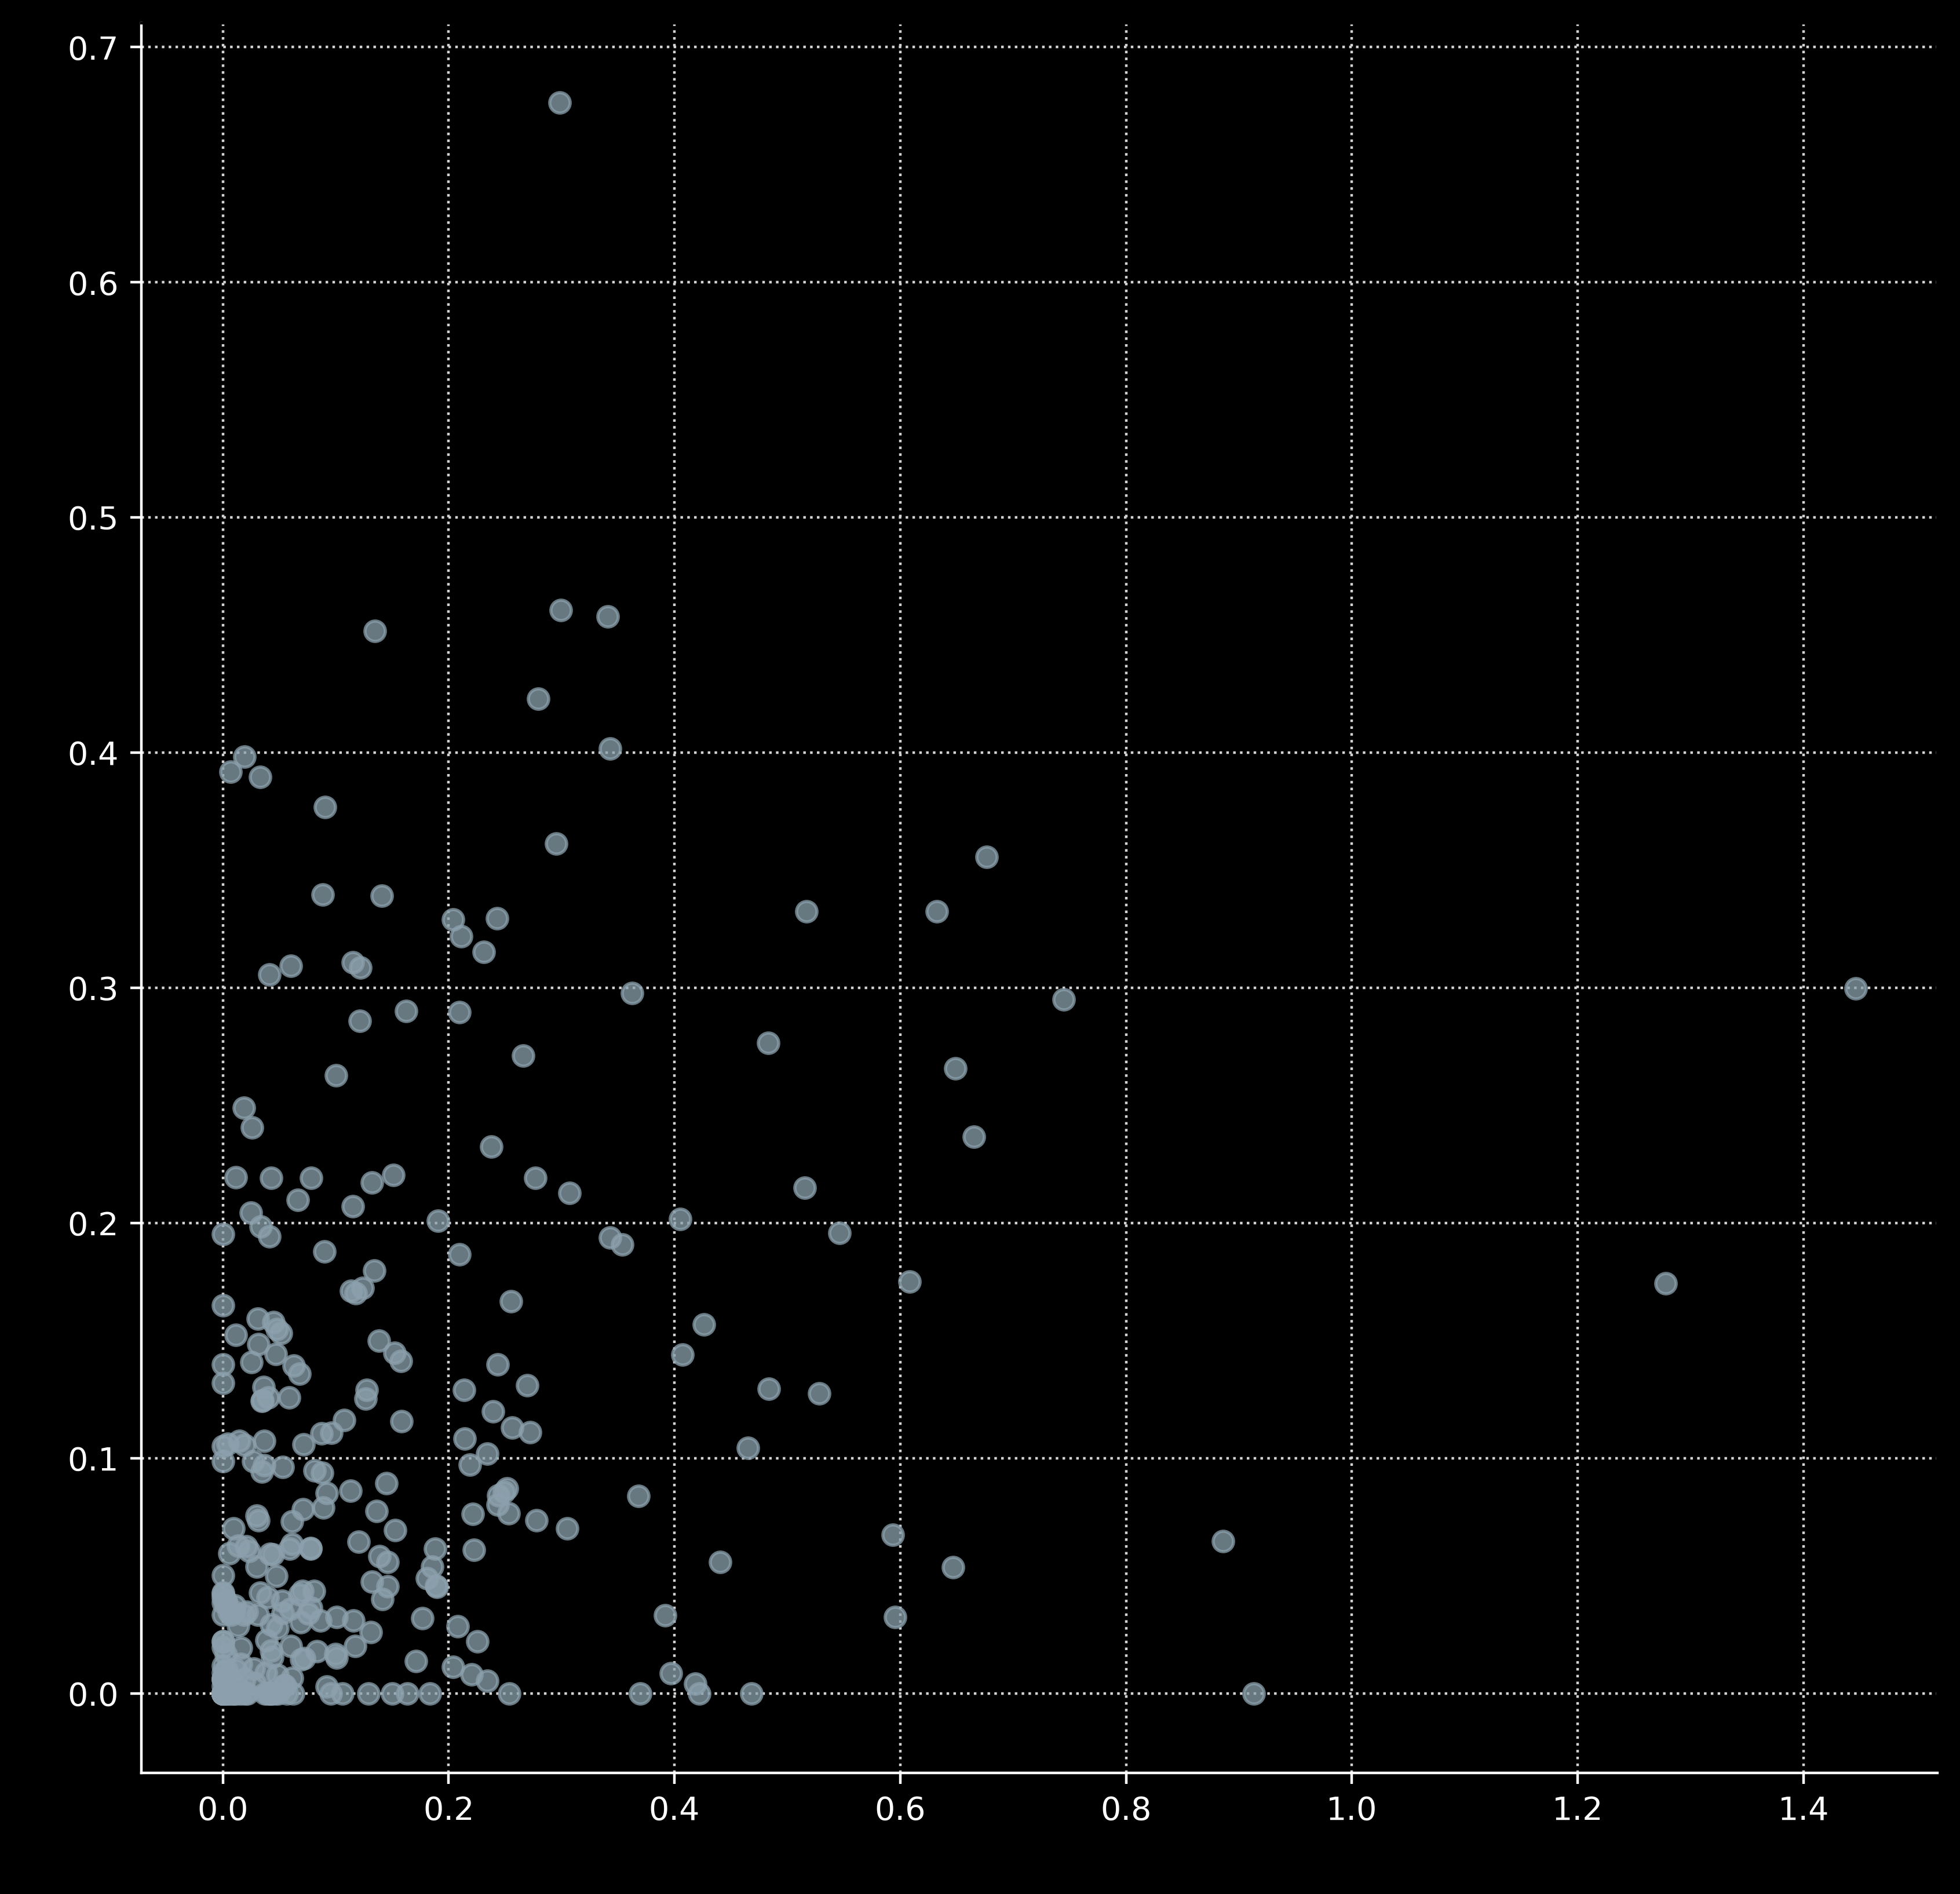

In [31]:
fig = plt.figure(figsize=(10,10), dpi=400)
ax = plt.subplot()




fig.set_facecolor('black')
ax.patch.set_facecolor('black')


ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')



# Add spines
ax.spines["left"].set_color('white')   #spines removes the plot edges(border)
ax.spines["bottom"].set_color('white')

# Add grid and axis labels
ax.grid(True, color = "lightgrey", ls = ":") #ls = linestyle,
ax.set_xlabel("xG For")
ax.set_ylabel("xG Against")


for x,y,z in zip(df["time"],df["xG/90"],df["xA/90"]): 
    if x > 90:
        ax.scatter(y,z,s = 40, alpha = 0.75,  color = "#8CA1AD",zorder = 3)



# Adjust ticks
ax.tick_params(axis = "x", rotation = 0)

## Create a new subset table of time played > 90

In [32]:
df1 = df[df["time"]>90]

In [33]:
df1

,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup,xG/90,xA/90,index
0,Erling Haaland,7,588.0,11,8.347453,1,1.139636,27,3,0,0,F,Manchester City,10,7.586284160614014,6.843545496463776,0.5759349958971143,1.277671,0.174434,1
1,Harry Kane,7,624.0,6,5.165231,1,2.044823,25,16,2,0,F,Tottenham,10,7.586284160614014,5.257903635501862,0.7281534075737,0.744985,0.294926,2
2,Aleksandar Mitrovic,7,630.0,6,4.528215,0,0.375948,31,5,2,0,F,Fulham,6,4.404061928391457,3.2239301279187202,0.8320949859917164,0.646888,0.053707,3
3,Ivan Toney,7,630.0,5,3.609063,2,1.505368,17,11,1,0,F,Brentford,6,4.404061928391457,4.079507291316986,1.4232266247272491,0.515580,0.215053,4
4,Wilfried Zaha,5,444.0,4,3.001864,0,0.864162,15,7,1,0,F M,Crystal Palace,5,3.005877509713173,3.114739939570427,0.8463326990604401,0.608486,0.175168,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Tyrell Malacia,6,401.0,0,0.014478,0,0.000000,1,0,1,0,D S,Manchester United,0,0,1.11141587048769,1.096938207745552,0.003249,0.000000,396
400,Keane Lewis-Potter,5,208.0,0,0.646218,1,0.977504,6,4,0,0,F S,Brentford,0,0,0.6896901801228523,0.048701029270887375,0.279614,0.422958,401
403,Marcos Senesi,4,234.0,0,0.000000,0,0.000000,0,0,0,0,D S,Bournemouth,0,0.28007474541664124,0.1433917824178934,0.1433917824178934,0.000000,0.000000,404
406,Matheus Nunes,5,438.0,0,0.706292,1,0.434382,8,4,1,0,M,Wolverhampton Wanderers,0,0.4115436486899853,1.6060359477996826,0.5490410625934601,0.145128,0.089257,407


In [34]:
nine = df1.quantile(0.9)
nine

time     630.000000
xG         1.517798
xA         1.137779
xG/90      0.361839
xA/90      0.270642
index    346.900000
Name: 0.9, dtype: float64

In [35]:
X = nine[3]

In [36]:
Y = nine[4]

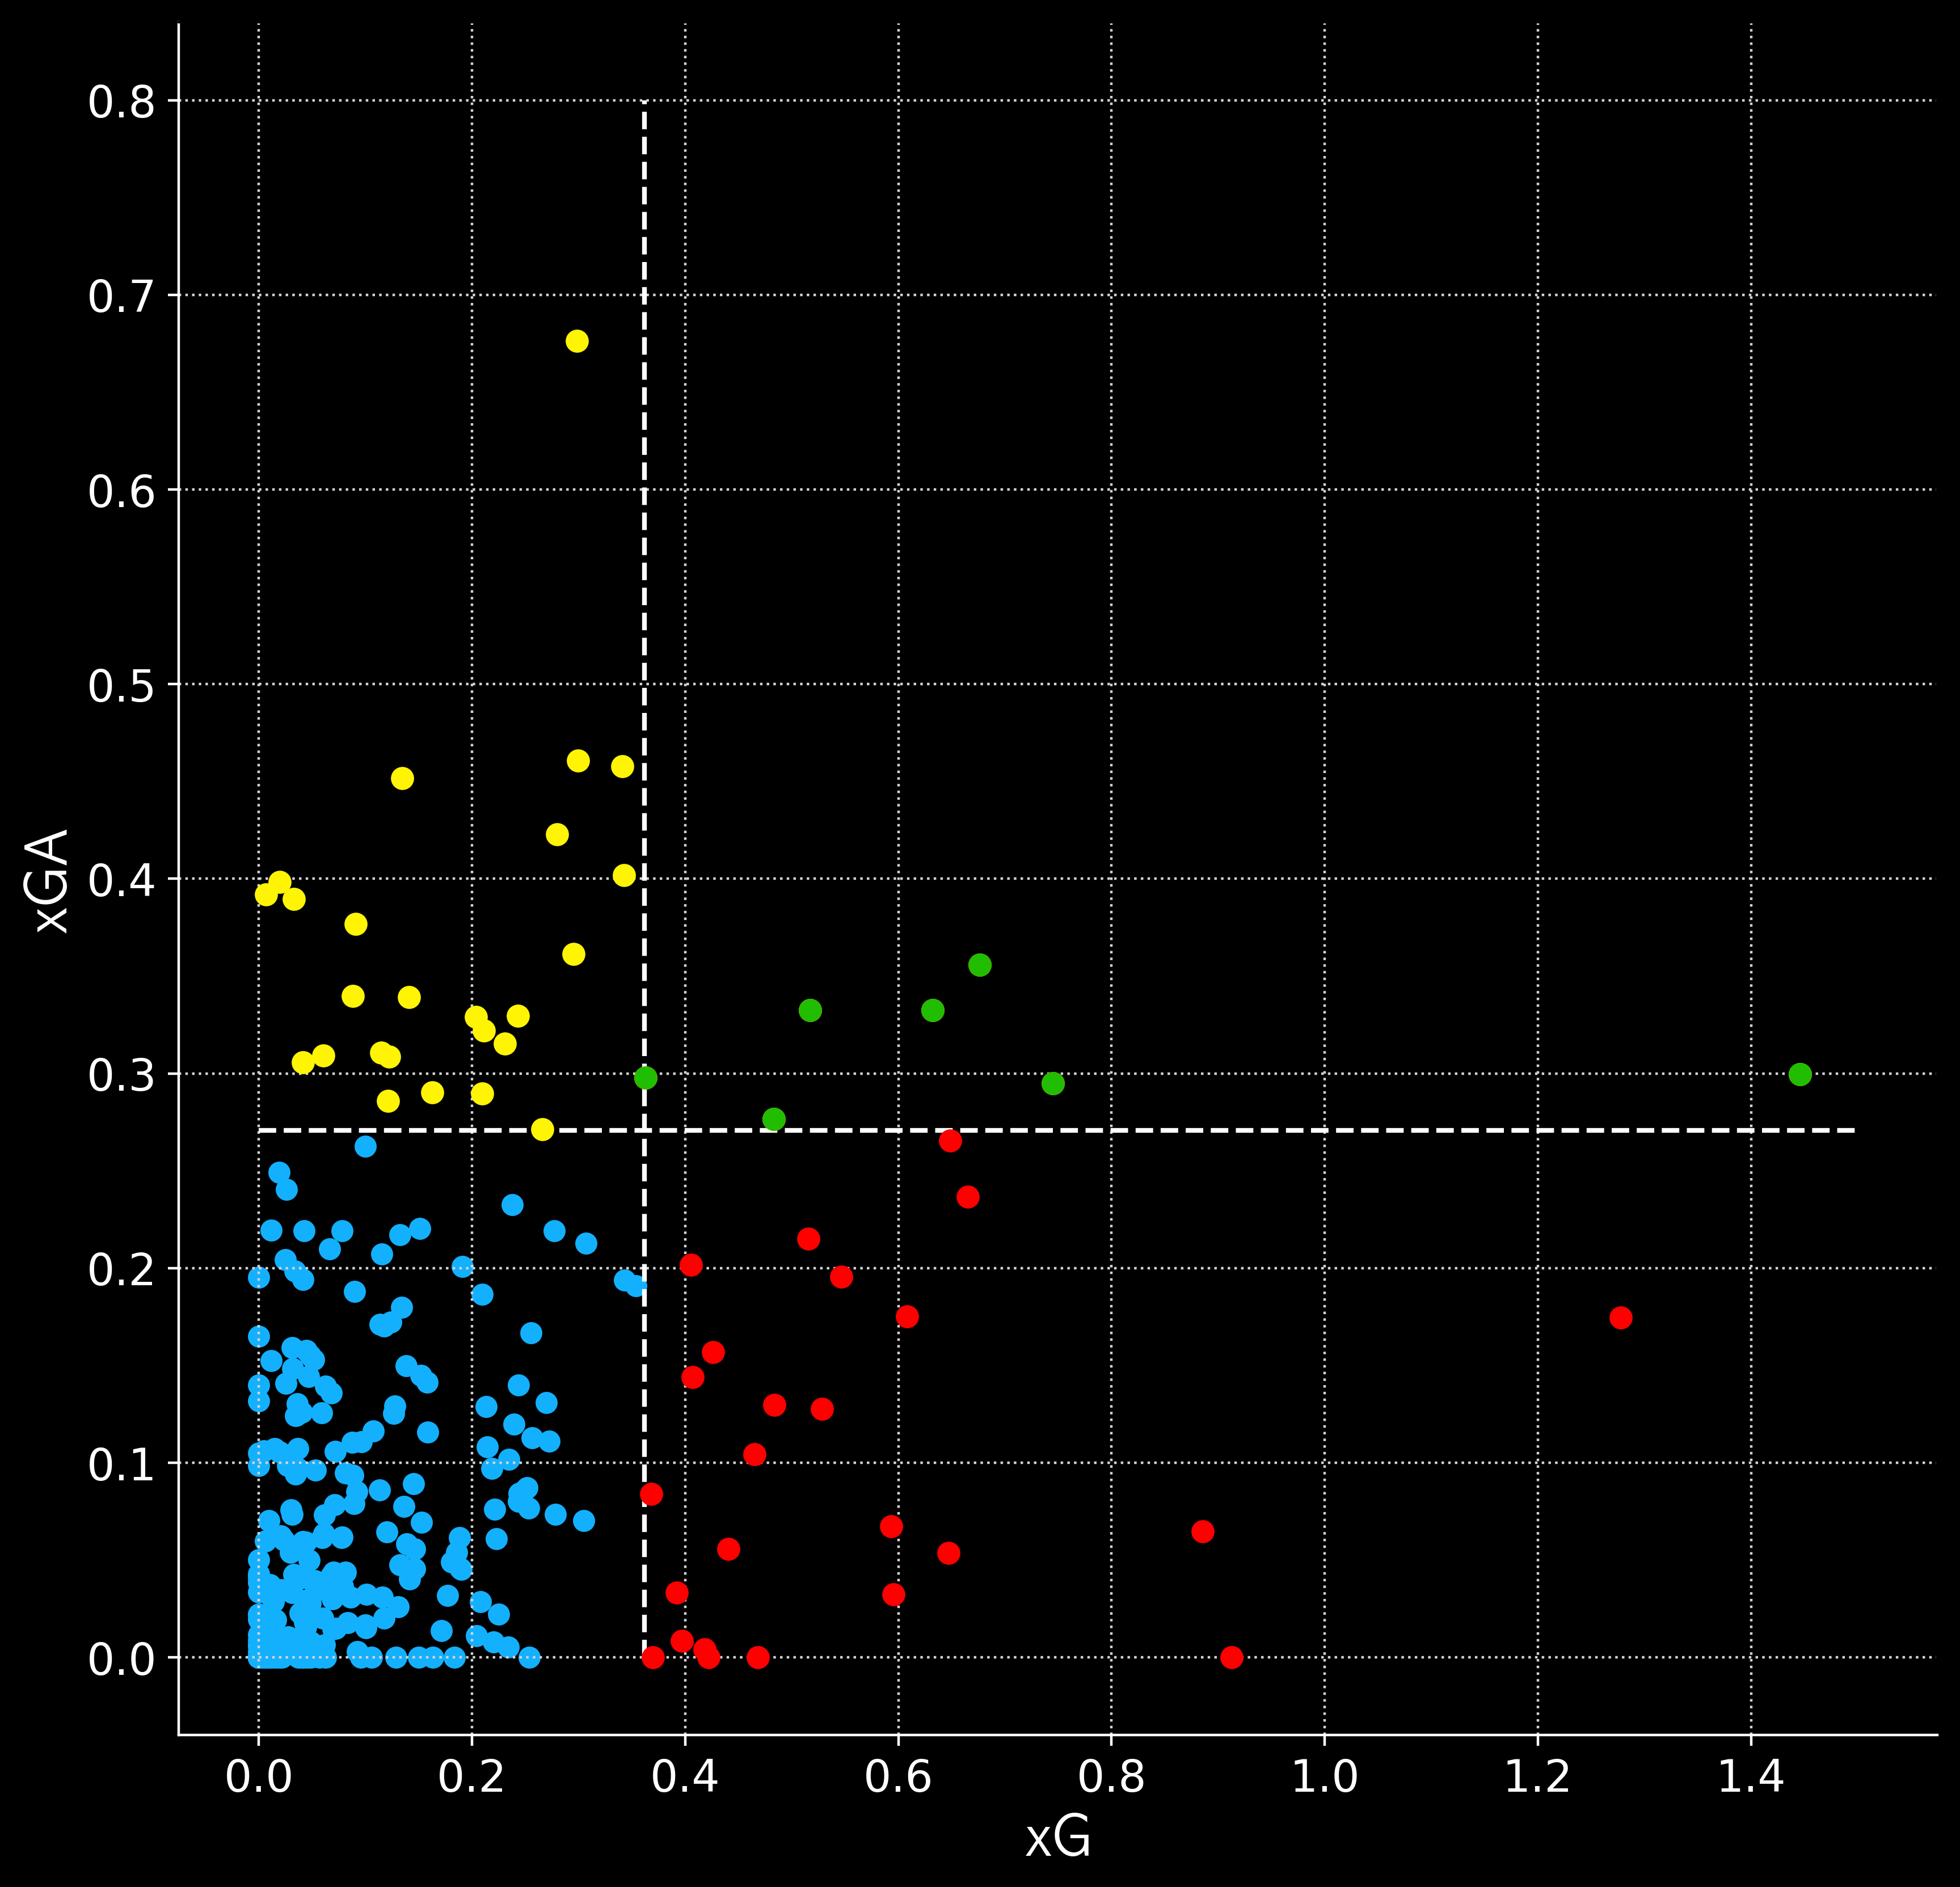

In [37]:
fig = plt.figure(figsize=(10,10), dpi=400)
ax = plt.subplot()



fig.set_facecolor('black')
ax.patch.set_facecolor('black')


ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')




# Add spines
ax.spines["left"].set_color('white')   #spines removes the plot edges(border)
ax.spines["bottom"].set_color('white')

# Add grid and axis labels
ax.grid(True, color = "lightgrey", ls = ":") #ls = linestyle,




plt.xlabel("xG",font ='AppleGothic',fontsize = 17,color="white")
plt.ylabel("xGA",font ='AppleGothic',fontsize = 17,color= "white")
ax.tick_params(labelsize=14)

#percentile line
xpoints = [0,1.5]
ypoints = [Y, Y]

plt.plot(xpoints, ypoints, color = 'white',linestyle = '--')


xpoints = [X,  X]
ypoints = [0,0.8]

plt.plot(xpoints, ypoints, color = 'white',linestyle = '--')

ax.scatter(df1["xG/90"],df1["xA/90"],color= "#13B0FE")
for y,z in zip(df1["xG/90"],df1["xA/90"]): 
    if y > X:
        ax.scatter(y,z,s = 40, alpha = 1,color= "#FF0000",zorder = 3)
    if z > Y:
        ax.scatter(y,z,s = 40, alpha = 1,color= "#FFF404",zorder = 3)
    if z > Y and y > X:
        ax.scatter(y,z,s = 40, alpha = 1,color= "#20BD00",zorder = 3)
    
        



# Adjust ticks
ax.tick_params(axis = "x", rotation = 0)

## Finding out player names 

## Red zone

In [38]:
red = df1[(df1["xG/90"]> X) & (df1["xA/90"] < Y)]

In [39]:
red 

,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup,xG/90,xA/90,index
0,Erling Haaland,7,588.0,11,8.347453,1,1.139636,27,3,0,0,F,Manchester City,10,7.586284160614014,6.843545496463776,0.5759349958971143,1.277671,0.174434,1
2,Aleksandar Mitrovic,7,630.0,6,4.528215,0,0.375948,31,5,2,0,F,Fulham,6,4.404061928391457,3.2239301279187202,0.8320949859917164,0.646888,0.053707,3
3,Ivan Toney,7,630.0,5,3.609063,2,1.505368,17,11,1,0,F,Brentford,6,4.404061928391457,4.079507291316986,1.4232266247272491,0.515580,0.215053,4
4,Wilfried Zaha,5,444.0,4,3.001864,0,0.864162,15,7,1,0,F M,Crystal Palace,5,3.005877509713173,3.114739939570427,0.8463326990604401,0.608486,0.175168,5
6,Gabriel Jesus,7,622.0,4,4.598862,3,1.635214,24,13,4,0,F,Arsenal,4,2.847894376143813,5.624604523181915,1.0840281192213297,0.665430,0.236607,7
7,Alexis Mac Allister,6,540.0,4,2.510122,0,0.024789,11,1,3,0,M,Brighton,4,2.847894376143813,2.2838143594563007,2.112794518470764,0.418354,0.004131,8
9,Son Heung-Min,7,534.0,3,2.415409,1,0.855066,21,13,0,0,M S,Tottenham,4,2.240695433691144,4.114037066698074,1.2199453711509705,0.407091,0.144112,10
11,Marcus Rashford,6,528.0,3,2.377268,2,1.183521,15,7,1,0,F M,Manchester United,4,2.5500049591064453,4.299041152000427,0.8012447692453861,0.405216,0.201737,12
16,Luis Díaz,6,530.0,3,2.593675,0,0.328509,16,4,1,0,F,Liverpool,3,2.056662317365408,4.773510545492172,2.2480998393148184,0.440435,0.055784,17
19,Callum Wilson,3,253.0,2,1.668214,0,0.189242,8,3,0,0,F,Newcastle United,3,2.4154092147946358,1.492937471717596,0.13959379866719246,0.593436,0.067319,20


In [40]:
len(red)

25

In [41]:
red["index"] = [i for i in range(1,26)]
red = red.set_index("index")

/var/folders/y9/7jjg2kks2396zw687mh2t7vc0000gn/T/ipykernel_1919/368049098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red["index"] = [i for i in range(1,26)]


In [42]:
red

,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup,xG/90,xA/90
index,,,,,,,,,,,,,,,,,,,
1,Erling Haaland,7,588.0,11,8.347453,1,1.139636,27,3,0,0,F,Manchester City,10,7.586284160614014,6.843545496463776,0.5759349958971143,1.277671,0.174434
2,Aleksandar Mitrovic,7,630.0,6,4.528215,0,0.375948,31,5,2,0,F,Fulham,6,4.404061928391457,3.2239301279187202,0.8320949859917164,0.646888,0.053707
3,Ivan Toney,7,630.0,5,3.609063,2,1.505368,17,11,1,0,F,Brentford,6,4.404061928391457,4.079507291316986,1.4232266247272491,0.515580,0.215053
4,Wilfried Zaha,5,444.0,4,3.001864,0,0.864162,15,7,1,0,F M,Crystal Palace,5,3.005877509713173,3.114739939570427,0.8463326990604401,0.608486,0.175168
5,Gabriel Jesus,7,622.0,4,4.598862,3,1.635214,24,13,4,0,F,Arsenal,4,2.847894376143813,5.624604523181915,1.0840281192213297,0.665430,0.236607
6,Alexis Mac Allister,6,540.0,4,2.510122,0,0.024789,11,1,3,0,M,Brighton,4,2.847894376143813,2.2838143594563007,2.112794518470764,0.418354,0.004131
7,Son Heung-Min,7,534.0,3,2.415409,1,0.855066,21,13,0,0,M S,Tottenham,4,2.240695433691144,4.114037066698074,1.2199453711509705,0.407091,0.144112
8,Marcus Rashford,6,528.0,3,2.377268,2,1.183521,15,7,1,0,F M,Manchester United,4,2.5500049591064453,4.299041152000427,0.8012447692453861,0.405216,0.201737
9,Luis Díaz,6,530.0,3,2.593675,0,0.328509,16,4,1,0,F,Liverpool,3,2.056662317365408,4.773510545492172,2.2480998393148184,0.440435,0.055784


In [49]:
red_list = list(red.iloc[0:5,0])

In [50]:
red_list

['Erling Haaland',
 'Aleksandar Mitrovic',
 'Ivan Toney',
 'Wilfried Zaha',
 'Gabriel Jesus']

In [105]:
red_x = list(red.iloc[0:5,17])
red_x

[1.277671395515909,
 0.6468878878014428,
 0.5155804633562054,
 0.6084860009267121,
 0.6654301416907471]

In [106]:
red_y=list(red.iloc[0:5,18])
red_y

[0.17443405122173075,
 0.05370692749108587,
 0.2150525716798646,
 0.17516805488314177,
 0.23660656843346414]

## Green Zone

In [125]:
green = df1[(df1["xG/90"]> X) & (df1["xA/90"] > Y)]

In [126]:
green

,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup,xG/90,xA/90,index
1,Harry Kane,7,624.0,6,5.165231,1,2.044823,25,16,2,0,F,Tottenham,10,7.586284160614014,5.257903635501862,0.7281534075737,0.744985,0.294926,2
5,Rodrigo,5,363.0,4,2.550005,1,1.341264,19,4,0,0,F M,Leeds,5,3.005877509713173,2.674336649477482,0.10923817753791809,0.632233,0.332545,6
10,Roberto Firmino,5,346.0,3,2.600429,3,1.367586,14,8,0,0,F S,Liverpool,4,2.5500049591064453,4.579496776685119,2.240050321444869,0.676412,0.355731,11
12,Raheem Sterling,6,524.0,3,2.812515,1,1.609859,11,8,1,0,F,Chelsea,4,4.598861645907164,4.655453532934189,0.35376944206655025,0.483066,0.276502,13
15,Gabriel Martinelli,7,607.0,3,2.446498,0,2.007990,21,16,0,0,M,Arsenal,1,0.22661525197327137,5.024869531393051,2.025592517107725,0.362743,0.297725,16
21,Mohamed Salah,6,540.0,2,3.102102,2,1.994946,17,24,0,0,F,Liverpool,3,2.600428983569145,5.636397868394852,1.5247939117252827,0.517017,0.332491,22
100,Darwin Núñez,3,179.0,1,2.876053,1,0.595939,15,4,0,1,F S,Liverpool,1,1.04087058827281,3.410010904073715,0.03680359572172165,1.446060,0.299634,101


In [127]:
green_list = list(green.iloc[0:5,0])
green_list

['Harry Kane',
 'Rodrigo',
 'Roberto Firmino',
 'Raheem Sterling',
 'Gabriel Martinelli']

In [128]:
green_x = list(green.iloc[0:5,17])
green_x

[0.7449852066257825,
 0.6322326344892013,
 0.6764121633561361,
 0.48306554157770315,
 0.36274274255730565]

In [129]:
green_y = list(green.iloc[0:5,18])
green_y

[0.29492633059047735,
 0.3325447735707622,
 0.355730533621387,
 0.27650246624159447,
 0.29772501837775184]

## Yellow Zone

In [64]:
yellow = df1[(df1["xG/90"] < X) & (df1["xA/90"] > Y)]

In [65]:
yellow = yellow.sort_values("assists",ascending = False)

In [66]:
yellow

,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup,xG/90,xA/90,index
44,Kevin De Bruyne,7,545.0,1,1.805925,6,4.095863,19,25,0,0,M S,Manchester City,2,0.7526491172611713,6.441869556903839,3.5648291558027267,0.298226,0.676381,45
112,Ivan Perisic,7,331.0,0,0.121456,3,1.433195,2,11,2,0,D S,Tottenham,1,0.6736968904733658,0.796835895627737,0.5678662061691284,0.033024,0.389690,113
81,Dejan Kulusevski,7,510.0,1,0.797085,3,1.922355,10,12,0,0,M S,Tottenham,2,0.7853578832000494,2.6380466669797897,0.4456581021659076,0.140662,0.339239,82
26,Phil Foden,7,541.0,2,1.461386,3,1.981175,10,12,1,0,F,Manchester City,3,1.3686380460858345,6.05774849653244,3.387836169451475,0.243114,0.329585,27
92,Jack Harrison,6,479.0,1,1.116274,3,1.541639,5,16,2,0,M,Leeds,1,0.06613922864198685,3.7743807062506676,1.6225831285119057,0.209738,0.289661,93
237,Richarlison,6,216.0,0,0.718584,2,1.105737,7,7,2,0,M S,Tottenham,0,0.31963828578591347,2.0107586681842804,0.2522523496299982,0.299410,0.460724,238
8,Pascal Groß,6,540.0,3,2.056662,2,2.410857,9,14,0,0,D F M,Brighton,4,2.240695433691144,4.984372675418854,1.0257297717034817,0.342777,0.401810,9
42,Allan Saint-Maximin,4,347.0,1,0.786325,2,1.268871,12,7,1,0,F,Newcastle United,2,3.102101683616638,3.1641466692090034,1.2592085748910904,0.203946,0.329102,43
75,Youri Tielemans,7,513.0,1,0.926154,1,1.653759,9,12,0,0,M S,Leicester,2,0.3010813295841217,2.985108107328415,2.092867746949196,0.162483,0.290133,76
355,Anthony Elanga,5,214.0,0,0.811069,1,1.088583,3,5,0,0,M S,Manchester United,0,0.07246982119977474,2.0582032185047865,0.4443235620856285,0.341104,0.457815,356


In [67]:
yellow_list = list(yellow.iloc[0:5,0])
yellow_list

['Kevin De Bruyne',
 'Ivan Perisic',
 'Dejan Kulusevski',
 'Phil Foden',
 'Jack Harrison']

In [109]:
yellow_x = list(yellow.iloc[0:5,17])
yellow_x

[0.2982260810399274,
 0.03302434093552414,
 0.1406620591878891,
 0.24311408028695147,
 0.20973841719998199]

In [110]:
yellow_y = list(yellow.iloc[0:5,18])
yellow_y

[0.6763810605630962,
 0.38969039084147833,
 0.33923909331069274,
 0.3295854482861742,
 0.2896607738758179]

In [156]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

# Final plot

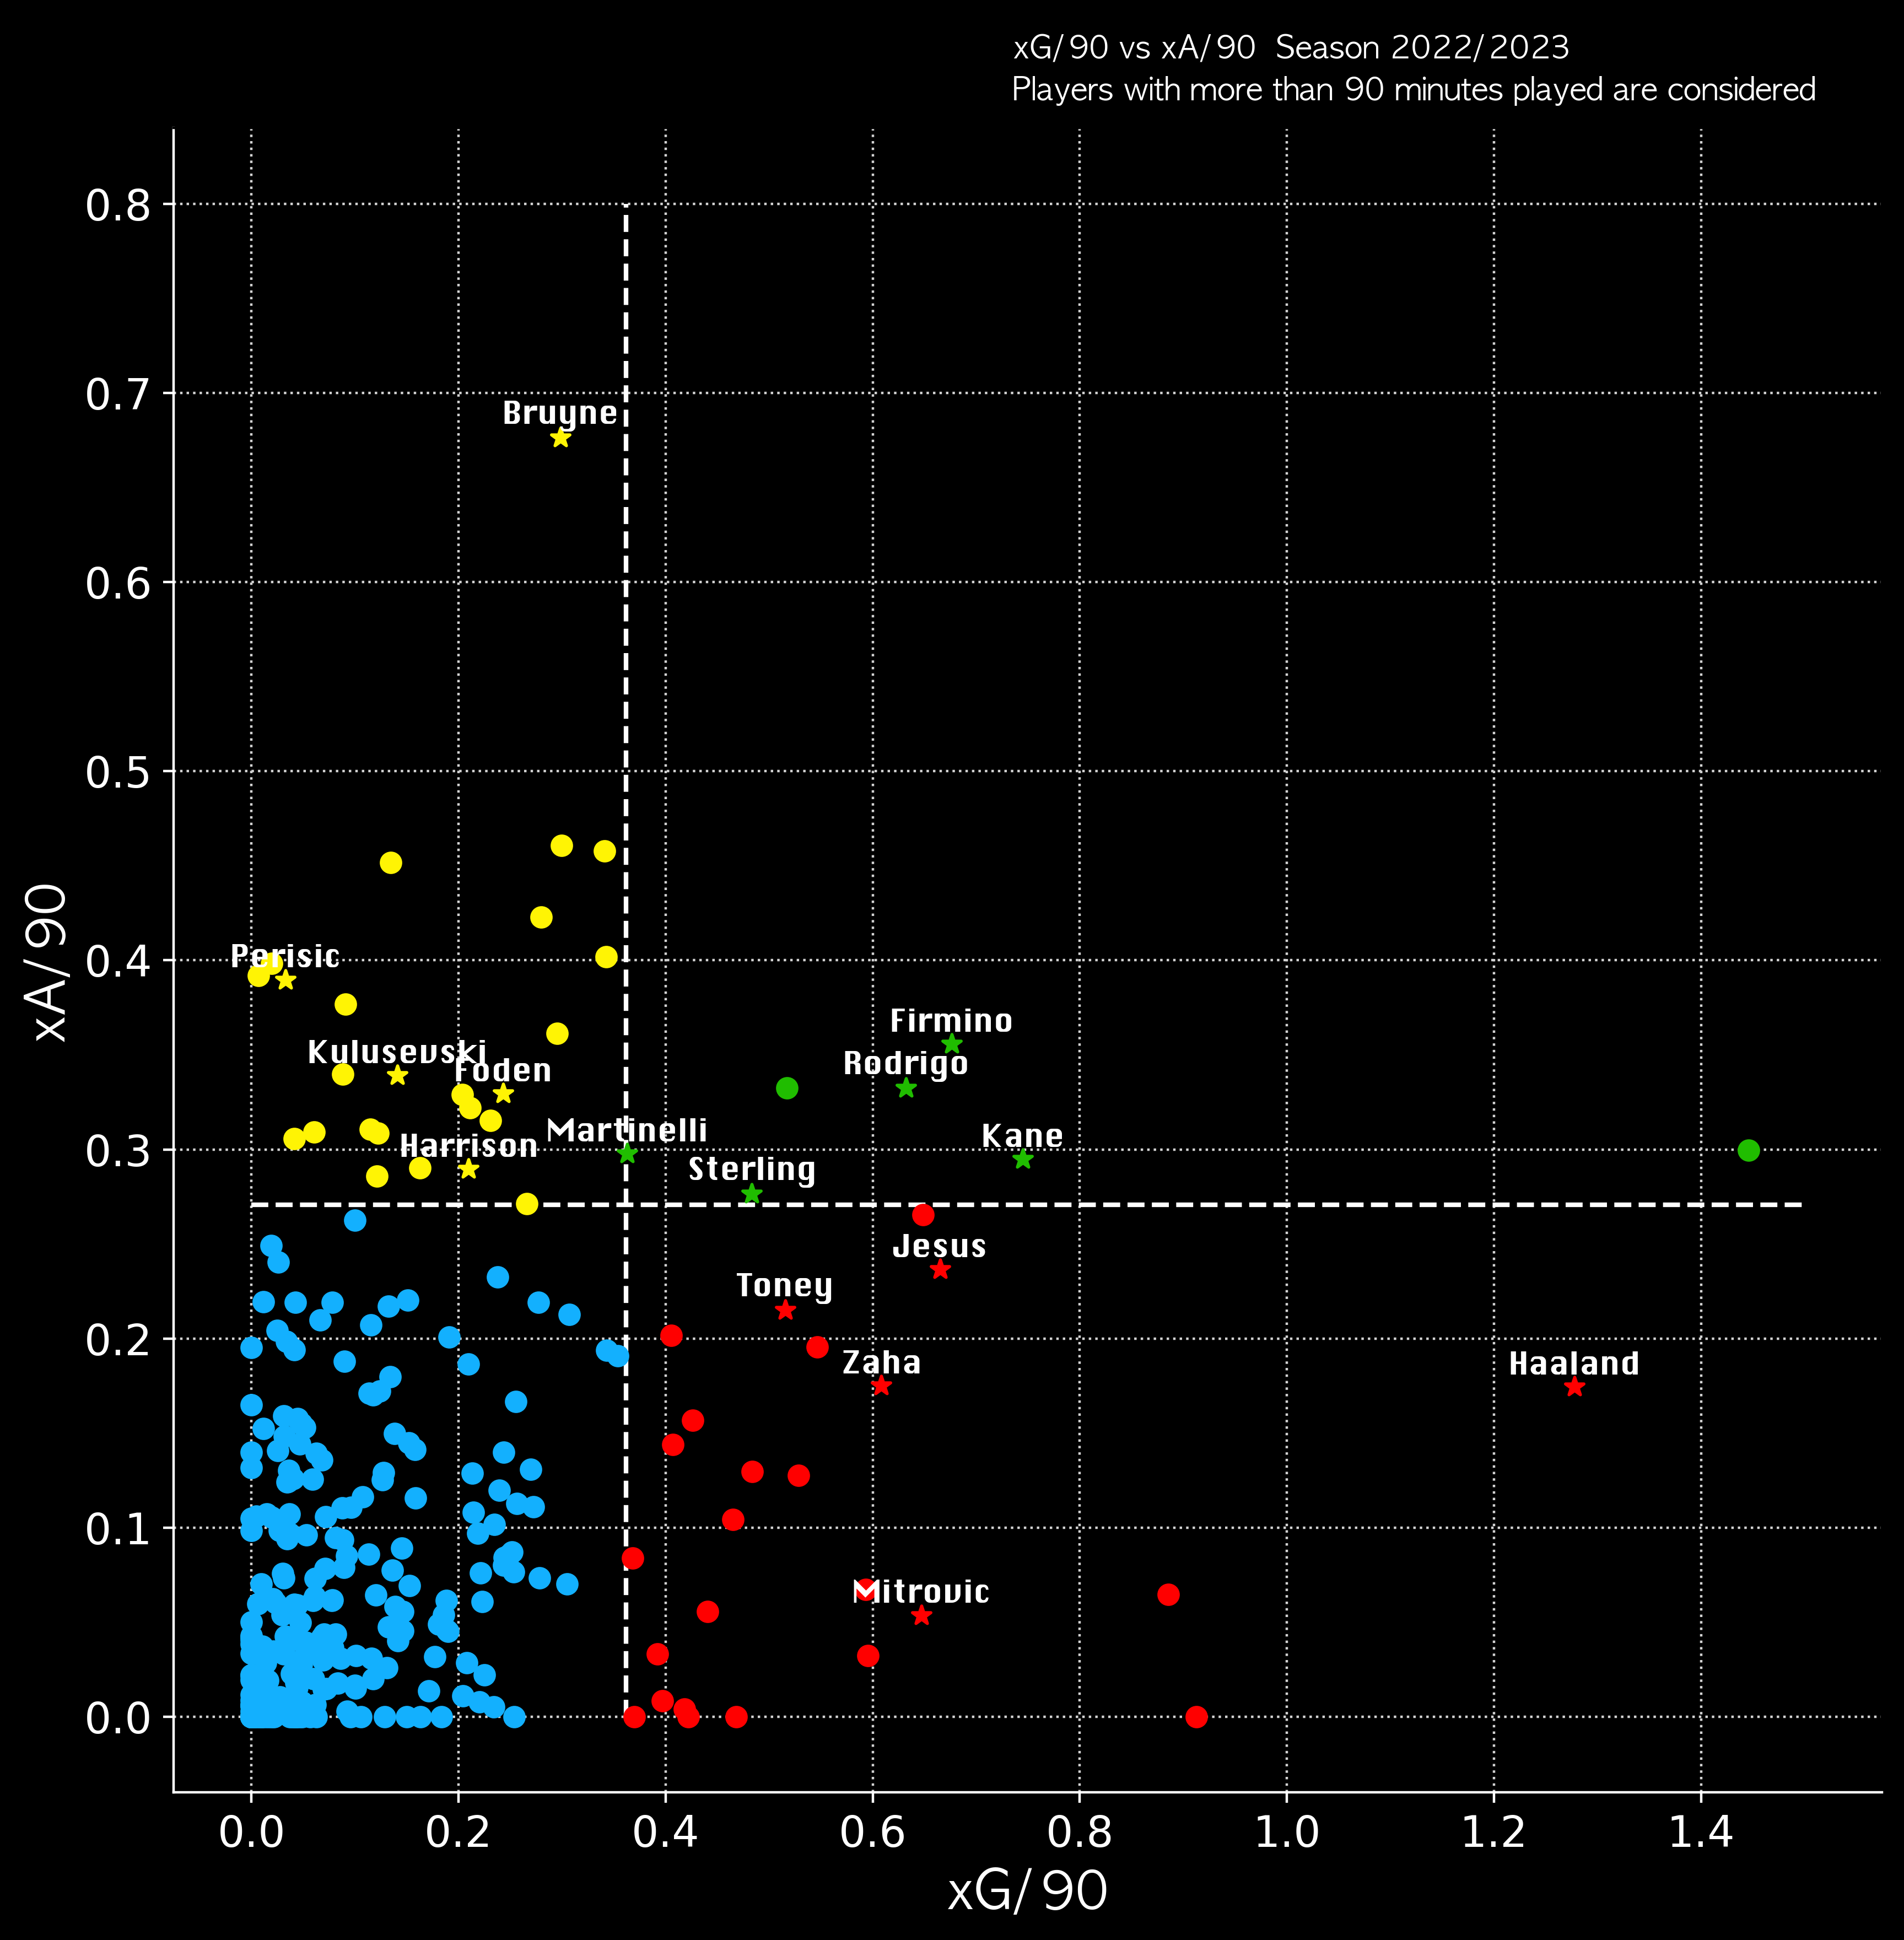

In [184]:
fig = plt.figure(figsize=(10,10), dpi=400)
ax = plt.subplot()



fig.set_facecolor('black')
ax.patch.set_facecolor('black')


ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')




# Add spines
ax.spines["left"].set_color('white')   #spines removes the plot edges(border)
ax.spines["bottom"].set_color('white')

# Add grid and axis labels
ax.grid(True, color = "lightgrey", ls = ":") #ls = linestyle,




plt.xlabel("xG/90",font ='AppleGothic',fontsize = 17,color="white")
plt.ylabel("xA/90",font ='AppleGothic',fontsize = 17,color= "white")
ax.tick_params(labelsize=14)

#percentile line
xpoints = [0,1.5]
ypoints = [Y, Y]

plt.plot(xpoints, ypoints, color = 'white',linestyle = '--')


xpoints = [X,  X]
ypoints = [0,0.8]

plt.plot(xpoints, ypoints, color = 'white',linestyle = '--')

for y,z,n in zip(df1["xG/90"],df1["xA/90"],df1["player_name"]): 
    if y > X and z < Y:
        if n in red_list:
            ax.scatter(y,z,s = 40, alpha = 1,color= "#FF0000",zorder = 3,marker="*")
        else :
            ax.scatter(y,z,s = 40, alpha = 1,color= "#FF0000",zorder = 3)
    if z > Y and y<X:
        if n in yellow_list:
            ax.scatter(y,z,s = 40, alpha = 1,color= "#FFF404",zorder = 3,marker="*")
        else:
            ax.scatter(y,z,s = 40, alpha = 1,color= "#FFF404",zorder = 3)
    if z > Y and y > X:
        if n in green_list:
            ax.scatter(y,z,s = 40, alpha = 1,color= "#20BD00",zorder = 3,marker="*")
        else:
            ax.scatter(y,z,s = 40, alpha = 1,color= "#20BD00",zorder = 3)
    if z < Y and y < X:
        ax.scatter(y,z,s = 40, alpha = 1,color= "#13B0FE",zorder = 3)
                       
     

        
        
        
# add text
for i,txt in enumerate(red_list):
    t = txt.split(" ")
    n = len(t)
    ax.annotate(
        xy = (red_x[i], red_y[i]),
        text = t[n-1],
        ha = "center",
        va = "center",
        xytext = (0, 7),
        textcoords = "offset points",
        weight = "bold",color="white",size =7,font="Krungthep"
    )


for i,txt in enumerate(green_list):
    t = txt.split(" ")
    n = len(t)
    ax.annotate(
        xy = (green_x[i],green_y[i]),
        text =t[n-1],
        ha = "center",
        va = "center",
        xytext = (0, 7),
        textcoords = "offset points",
        weight = "bold",color="white",size =7,font="Krungthep"
    )

for i,txt in enumerate(yellow_list):
    t = txt.split(" ")
    n = len(t)
    ax.annotate(
        xy = (yellow_x[i],yellow_y[i]),
        text = t[n-1],
        ha = "center",
        va = "center",
        xytext = (0, 7),
        textcoords = "offset points",weight="bold",
        color="white",size =7,font="Krungthep"
    )
    

    
# Adjust ticks
ax.tick_params(axis = "x", rotation = 0)



fig_text(
	x = 0.87, y = .89, 
    s = "xG/90 vs xA/90  Season 2022/2023\nPlayers with more than 90 minutes played are considered",
	va = "bottom", ha = "right",
	 color = "white", font = "AppleGothic"
)


fig.savefig("AFC VS ARS.jpg")